# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
k=8
kmeans = KMeans(n_clusters=k)

In [6]:
labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, labels)
centroids = kmeans.cluster_centers_

In [7]:
centroids[0]

array([1.29277778e+01, 2.76296296e+00, 2.35703704e+00, 1.91259259e+01,
       1.03555556e+02, 2.04777778e+00, 1.53592593e+00, 4.02592593e-01,
       1.49185185e+00, 5.46444444e+00, 9.15925926e-01, 2.36814815e+00,
       7.15814815e+02])

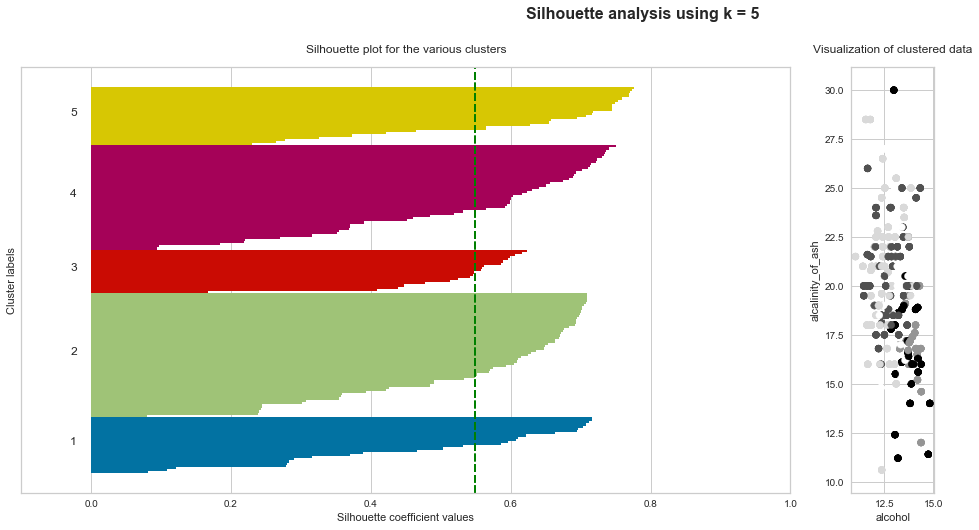

In [41]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
        
        
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);
        
        ax2.scatter(X['alcohol'], X['alcalinity_of_ash'], c=labels)
        #ax2.scatter(centroids['alcohol'], centroids['alcalinity_of_ash'], marker='*', c='r', s=250)
        ax2.set_xlabel('alcohol')
        ax2.set_ylabel('alcalinity_of_ash')
        ax2.set_title('Visualization of clustered data', y=1.02)
        ax2.set_aspect('equal')
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [15]:
def my_kmeans_plot(k):
    kmeans = KMeans(n_clusters=k)

    labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, labels)
    centroids = kmeans.cluster_centers_

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
        
        
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);
        
        ax2.scatter(X['alcohol'], X['alcalinity_of_ash'], c=labels)
        #ax2.scatter(centroids['alcohol'], centroids['alcalinity_of_ash'], marker='*', c='r', s=250)
        ax2.set_xlabel('alcohol')
        ax2.set_ylabel('alcalinity_of_ash')
        ax2.set_title('Visualization of clustered data', y=1.02)
        ax2.set_aspect('equal')
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

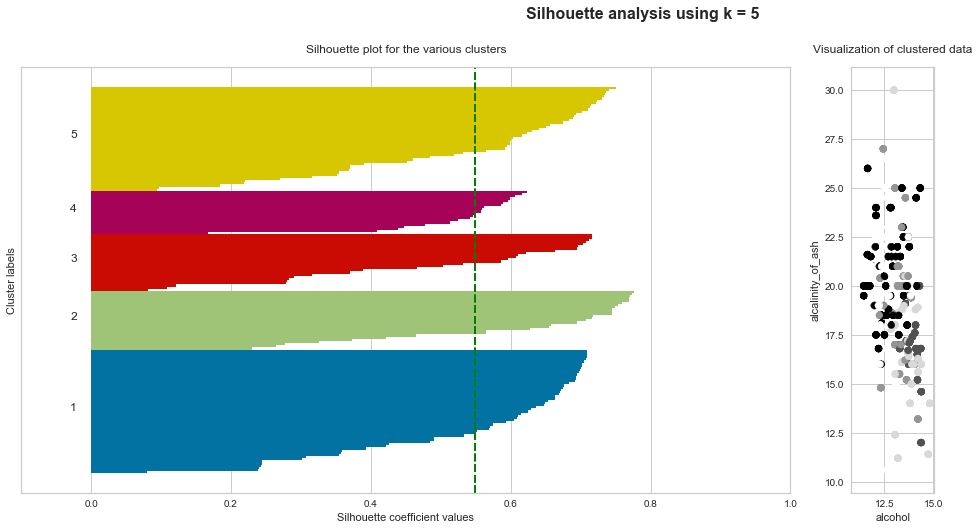

In [17]:
my_kmeans_plot(5)

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

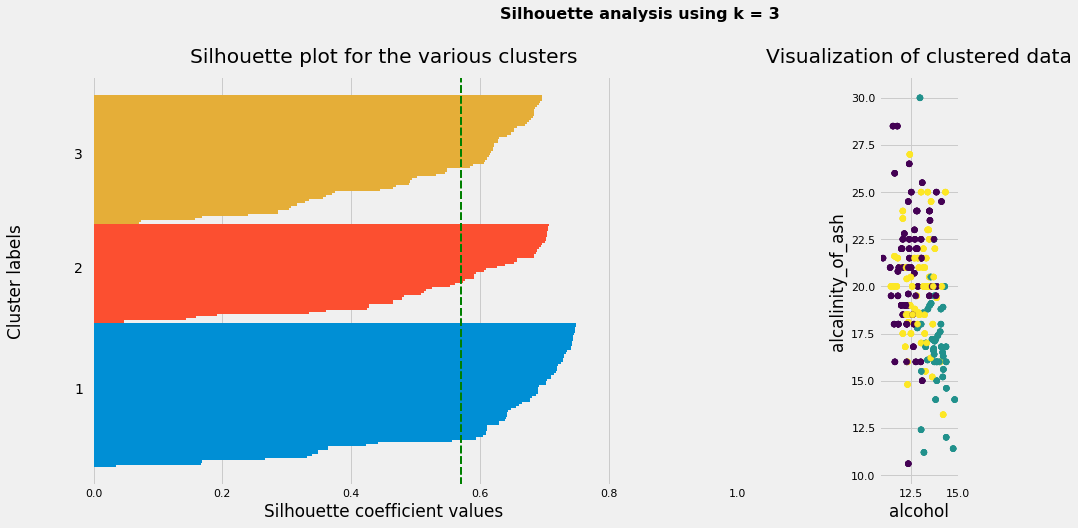

In [11]:
my_kmeans_plot(3)

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

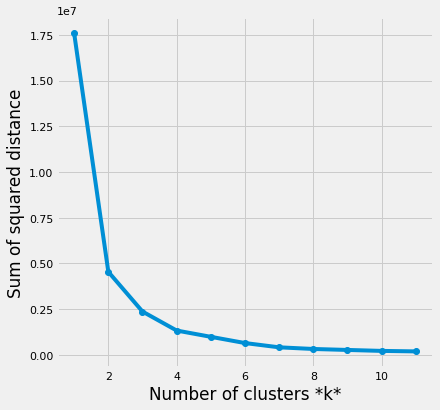

In [10]:
sse = []
list_k = list(range(1, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [53]:
# pip install Yellowbrick

Note: you may need to restart the kernel to use updated packages.


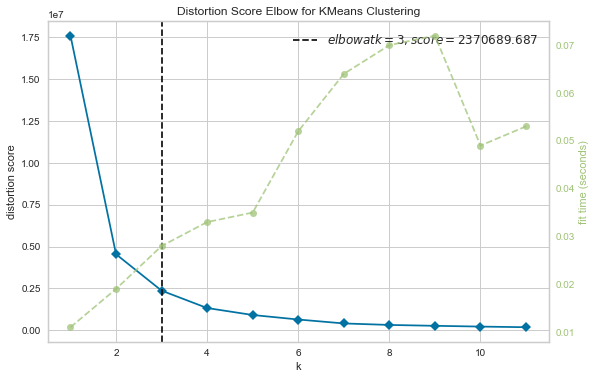

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, 
                              k=(1,12), 
                              metric='distortion',
                             # timings=False,
                             )
visualizer.fit(X)
# The poof() method finalizes the drawing (adding titles, axes labels, etc) and then renders the image on your behalf
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [13]:
from sklearn.cluster import AgglomerativeClustering

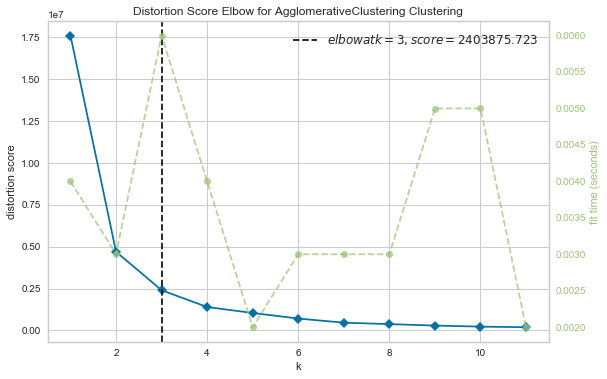

In [14]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, 
                              k=(1,12), 
                              metric='distortion',
                             # timings=False,
                             )
visualizer.fit(X)
# The poof() method finalizes the drawing (adding titles, axes labels, etc) and then renders the image on your behalf
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

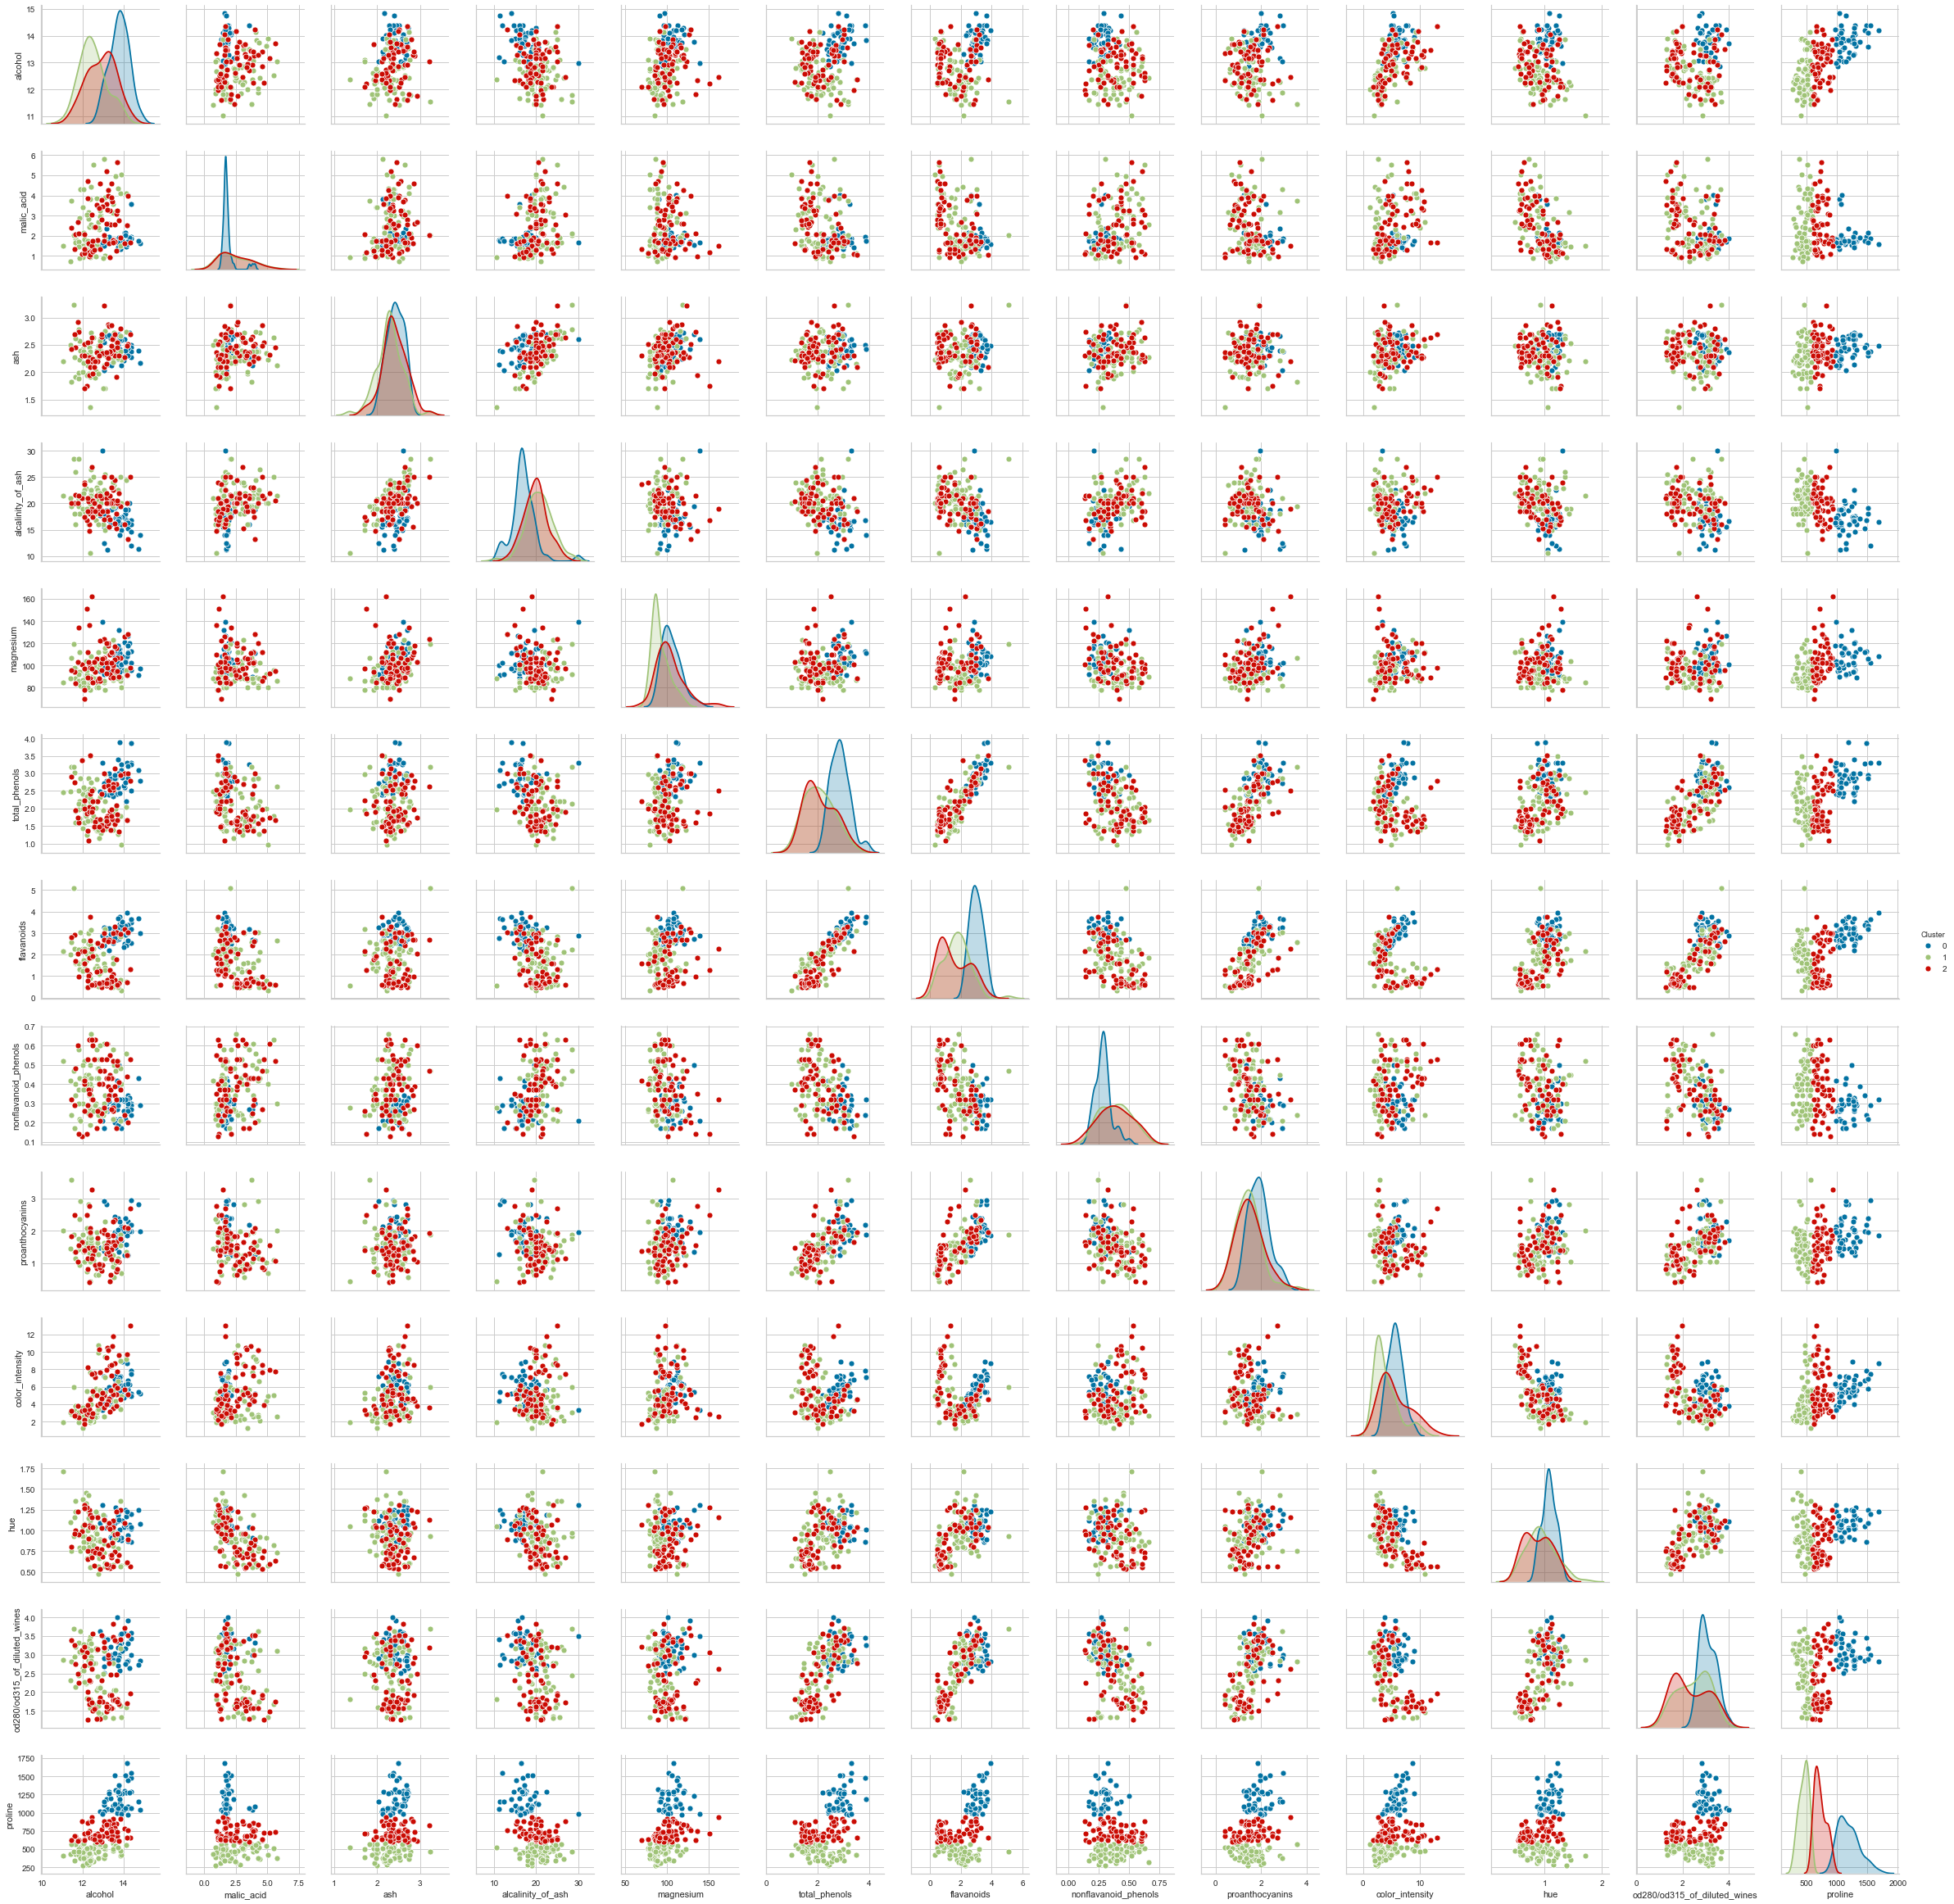

In [23]:
#considering that both KMeans and AgglomerativeClustering show k=3 like a great candidate to be the number of clusters:

df = pd.DataFrame(X, columns=data['feature_names'])

model = KMeans(n_clusters=3)
model.fit(X)
df['Cluster'] = model.predict(X)
sns.pairplot(df_data, hue='Cluster', vars=df_data.columns[:-1])

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [25]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3).fit(X)

pca_x = pca_model.transform(X)

In [26]:
pca_df = pd.concat([pd.DataFrame(pca_x), df_data['Cluster']], axis=1)

In [27]:
pca_df

,0,1,2,Cluster
0,318.562979,21.492131,3.130735,0
1,303.097420,-5.364718,6.822835,0
2,438.061133,-6.537309,-1.113223,0
3,733.240139,0.192729,-0.917257,0
4,-11.571428,18.489995,-0.554422,2
5,703.231192,-0.332159,0.949375,0
6,542.971581,-13.518967,2.126943,0
7,548.401860,11.449432,0.040492,0
8,298.036863,-8.180158,3.880975,0
9,298.049553,-7.101543,1.558455,0


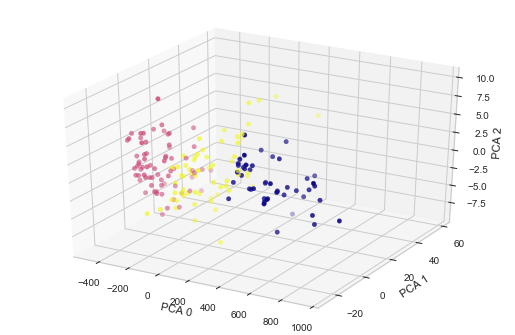

In [54]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100


xs = pca_df[0]
ys = pca_df[1]
zs = pca_df[2]
ax.scatter(xs, ys, zs, cmap='plasma', c=pca_df['Cluster'])
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')

plt.show()

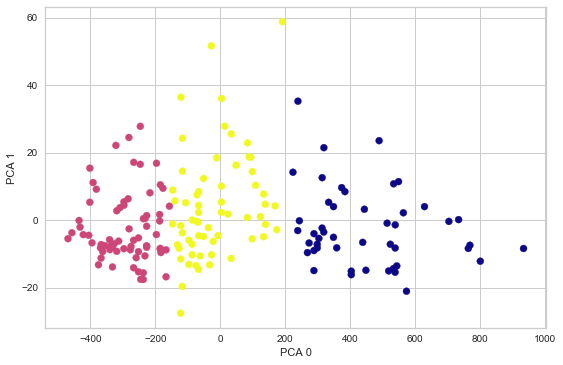

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

n = 100


xs = pca_df[0]
ys = pca_df[1]
ax.scatter(xs, ys, cmap='plasma', c=pca_df['Cluster'])
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')


plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

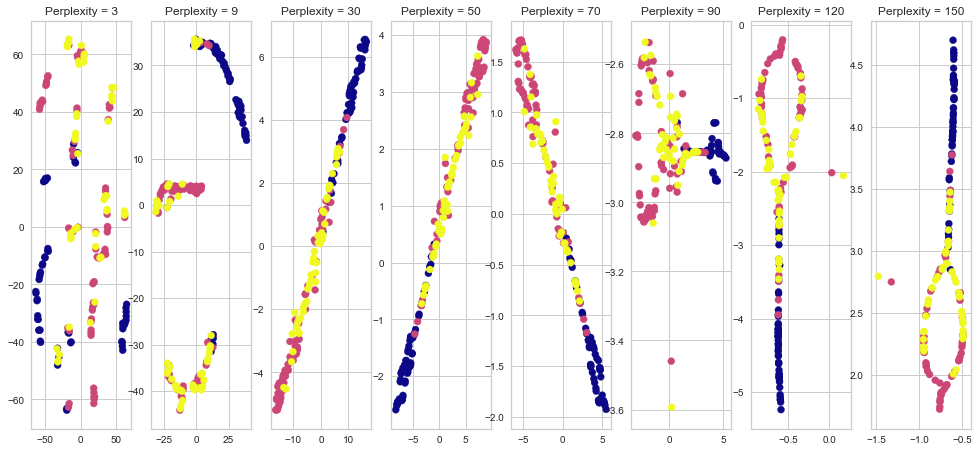

In [63]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 8, figsize=(15, 7))

for i, perp in enumerate([3, 9, 30, 50, 70, 90, 120, 150]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap='plasma')
    ax[i].set_title("Perplexity = {}".format(perp))

plt.show()